# Corona Tweets 
In this notebook we will be working on text mining. The dataset we will be using is a collection of tweets on covid-19. Because this collection is large, we do not want to analyse them by hand. Using automated techniques and word clouds we will be visualising this data to understand their content.

## Data download

First we need to download the tweets. You can find the data on this url: https://www.kaggle.com/datasets/gpreda/covid19-tweets?select=covid19_tweets.csv

Download the file, and upload it into your Google Colab environment, or put it in the directory of your own Python environment where your notebook is

In [1]:
import pandas as pd

tweets = pd.read_csv('covid19_tweets.csv')
tweets.columns = tweets.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')




How many tweets are in the set?


## Tweets 

Using the code below we can inspect some tweet-texts. When (in colab) you press the magic wand, you can filter and scroll through tweets. 

In [2]:
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
# we are only interested in tweets with content so we remove empty tweets
tweets = tweets.dropna(subset=['text'])

## Tweets visualisation (word cloud)

Now we have looked at a few sample tweets we want to get a broader view of the data. We will make a simple wordcloud of all the tweet-text. The word cloud shows which words are most frequent

In order to make the word cloud, we need to split the text into words, this is called tokenization

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def print_wordcloud(data):

  wc = WordCloud(background_color = 'black', height = 1500, width = 4000).generate(data)
  
  plt.figure(figsize = (10, 20))
  plt.imshow(wc, interpolation = "hamming")

  plt.axis('off')
  plt.show()


In [7]:

# the word cloud function uses one text as input, so we need to concatenate the tweets
all = ' '.join(text for text in tweets['text'])
print_wordcloud(all)


OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Better wordclouds

As you can see, our first attempt contains a lot of rubbish data. This is often the case when dealing with web content. 
Moreover, we need to determine what we are interested in. This data is collected by searching on the term 'covid19' so of course this term is frequent, but this is not necessarily what we are interested in.

Wordclouds become more useful when comparing various views on the data. In the next exercises we are going to improve the wordclouds and compare wordclouds.

In [6]:
# preprocessing tweets (removing urls and such)
import re

def cleanup_tweet(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www.\S+', '', text)
    text = text.replace('RT ', ' ')
    text = text.replace('&amp;', 'and')
    text = text.replace(r'[^A-Za-z0-9]+', ' ')
    text = text.lower()
    return text

tweets['text'] = tweets['text'].apply(cleanup_tweet)

In [7]:
# nltk is a library that has special function tokenize tweets
from nltk.util import ngrams
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
tweets['tokenized'] = tweets['text'].apply(tt.tokenize)

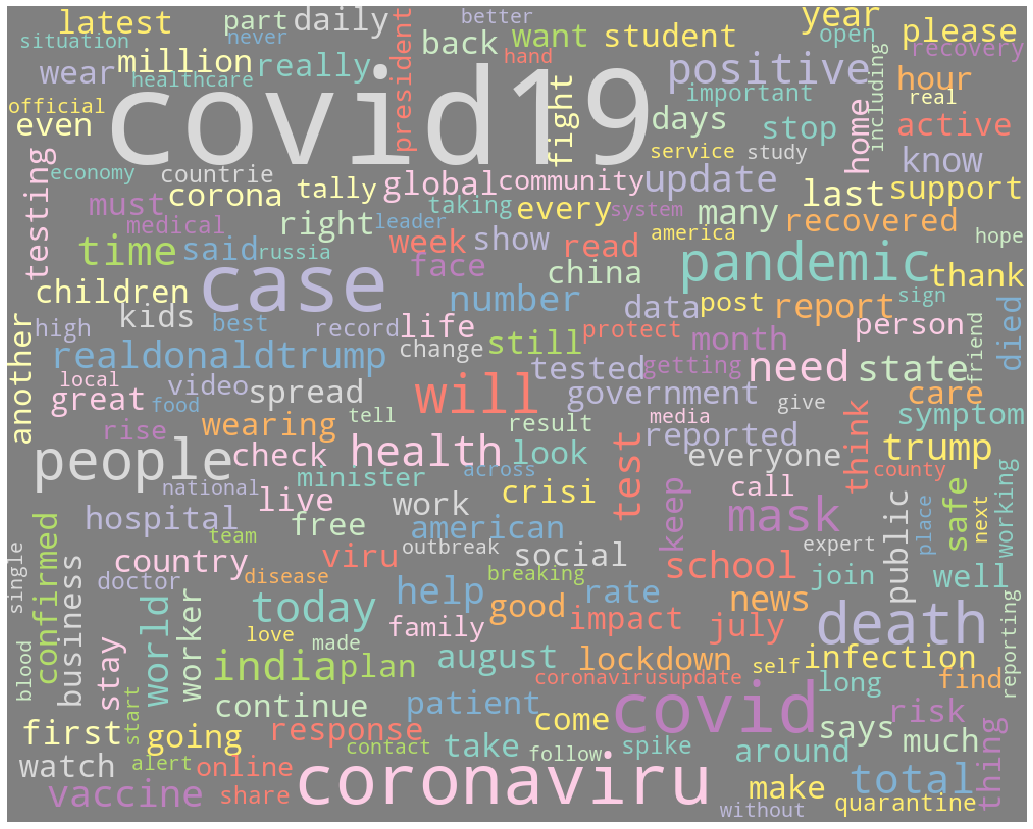

In [8]:
from wordcloud import STOPWORDS
def better_wordcloud(df, feature, stopword_set):
    rows = [" ".join(el) if isinstance(el, list) else str(el) for el in df[feature]]
    data = " ".join(rows)

    wordcloud = WordCloud(width = 1000,
                         height = 800,
                         stopwords = stopword_set,
                         collocations=False,
                         colormap = 'Set3',
                         margin = 0,
                         max_words = 200,
                         min_word_length = 4,
                         max_font_size = 130, min_font_size = 15,
                         background_color ='gray').generate(data)
    plt.figure(figsize = (20,15))
    plt.imshow(wordcloud)
    plt.axis('off')


stopwoorden = STOPWORDS
better_wordcloud(tweets, 'tokenized', stopwoorden)

# we can also remove stopwords (words that occur frequent but are meaningless)


# je kunt met deze functie ook wordclouds maken van bijvoorbeeld de usernames, de hashtags of andere kolommen
# verander hiervoor 'tokenized' in 1 van de andere kolomnamen

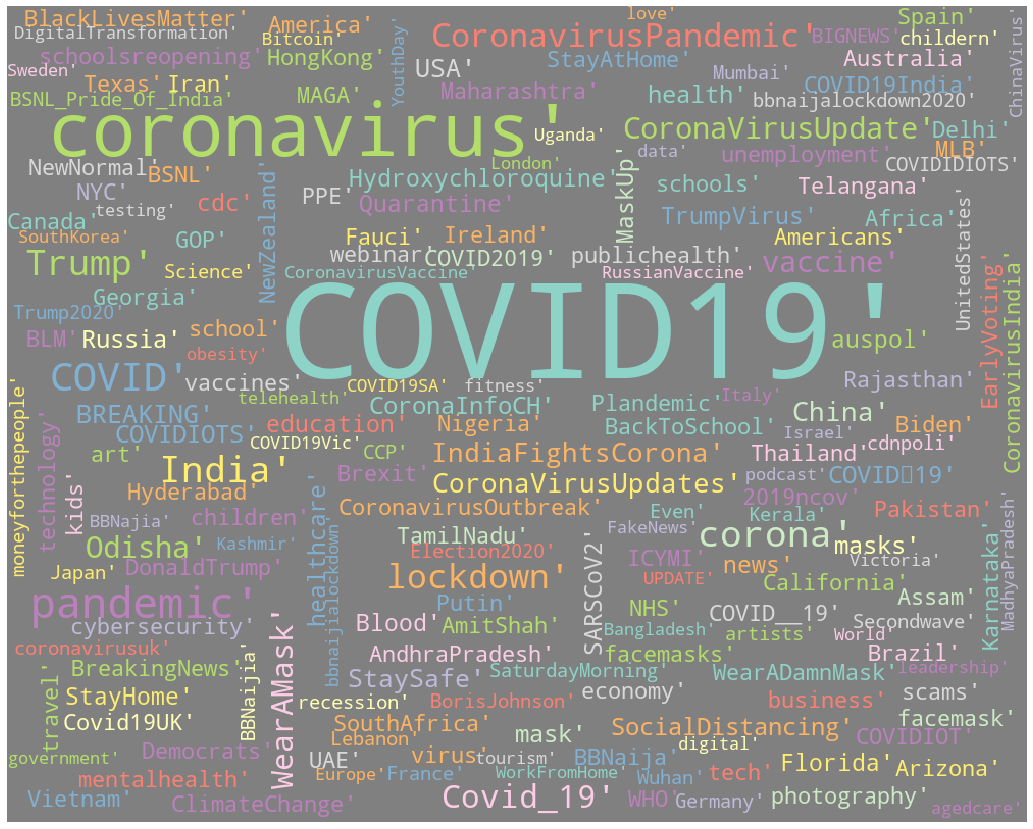

In [11]:
better_wordcloud(tweets, 'hashtags', stopwoorden)

# Exercise 1

With above code, create a wordcloud of the textual content, but also of the hashtags. What do you see?

# Exercise 2

We will be comparing various views on the dataset. For this exercise we will compare the wordcloud of positive tweets, neutral tweets and negative tweets.

1. use the code below to tag each tweet with a sentiment label
2. make a selection of the tweets for which you build a word cloud (using e.g. `tweets['text'][tweets['sentiment_label'] == 'positive']`
3. Compare the wordcloud for positive tweets to that of negative tweets. What do you see
4. Compare the wordclouds to the neutral tweets, what do you see now?

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mayasappelli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
## With this code you can analyse sentiment of tweets.
## This sentimentIntensityAnalyzer looks at the polarity of a message and gives a numerical score 
## for positivity, negativity as well as a compound score. We only use the compound score to determine the sentiment label
## The method uses a dictionary to map lexical features to emotion intensity scores

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def get_sentiment(row):
 sentiment_score = sid.polarity_scores(row)
 return sentiment_score['compound']

tweets['sentiment_scores'] = tweets['text'].apply(get_sentiment)
tweets['sentiment_label'] = tweets['sentiment_scores'].apply(lambda x : 'neutral' if x==0 else ('positive' if x> 0 else 'negative'))

tweets.head()




,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tokenized,sentiment_scores,sentiment_label
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,if i smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,"[if, i, smelled, the, scent, of, hand, sanitiz...",0.4939,positive
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,hey @yankees @yankeespr and @mlb - wouldn't it...,NaN,Twitter for Android,False,"[hey, @yankees, @yankeespr, and, @mlb, -, woul...",0.2263,positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realdonaldtrump trump nev...,['COVID19'],Twitter for Android,False,"[@diane3443, @wdunlap, @realdonaldtrump, trump...",-0.2732,negative
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv the one gift #covid19 has give me...,['COVID19'],Twitter for iPhone,False,"[@brookbanktv, the, one, gift, #covid19, has, ...",0.7351,positive
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 july : media bulletin on novel #coronavirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[25, july, :, media, bulletin, on, novel, #cor...",0.3182,positive


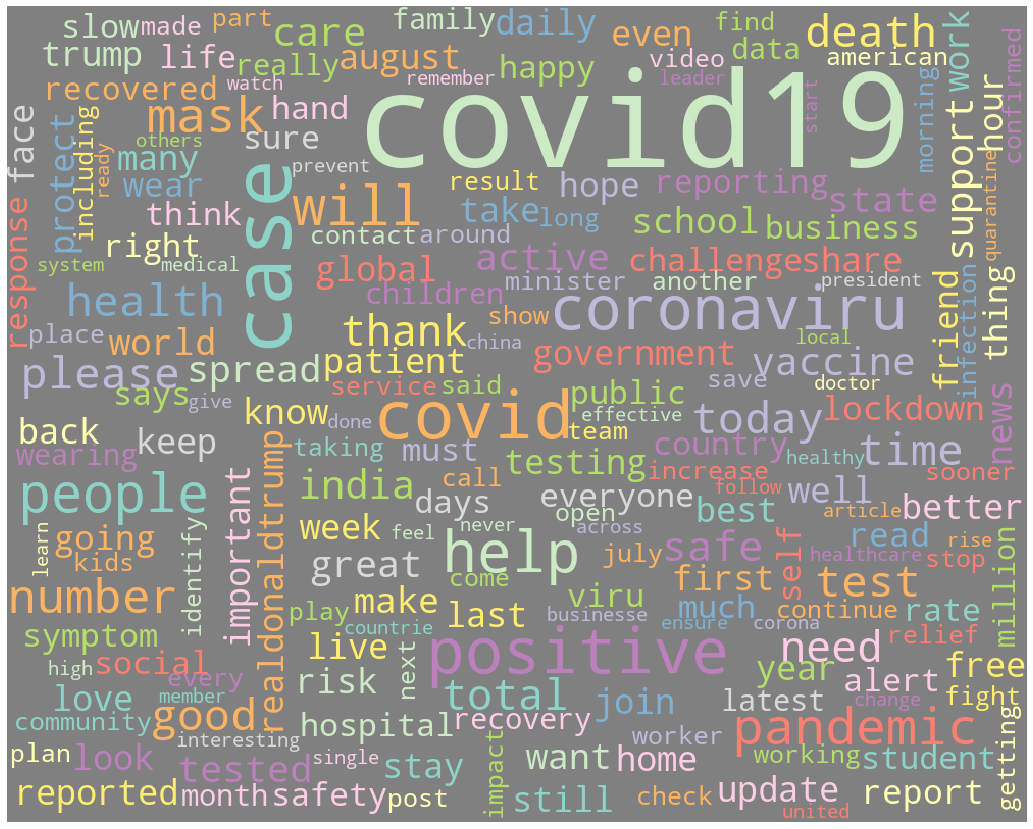

In [12]:
positives = tweets[tweets['sentiment_label'] == 'positive']
better_wordcloud(positives, 'tokenized', stopwoorden)

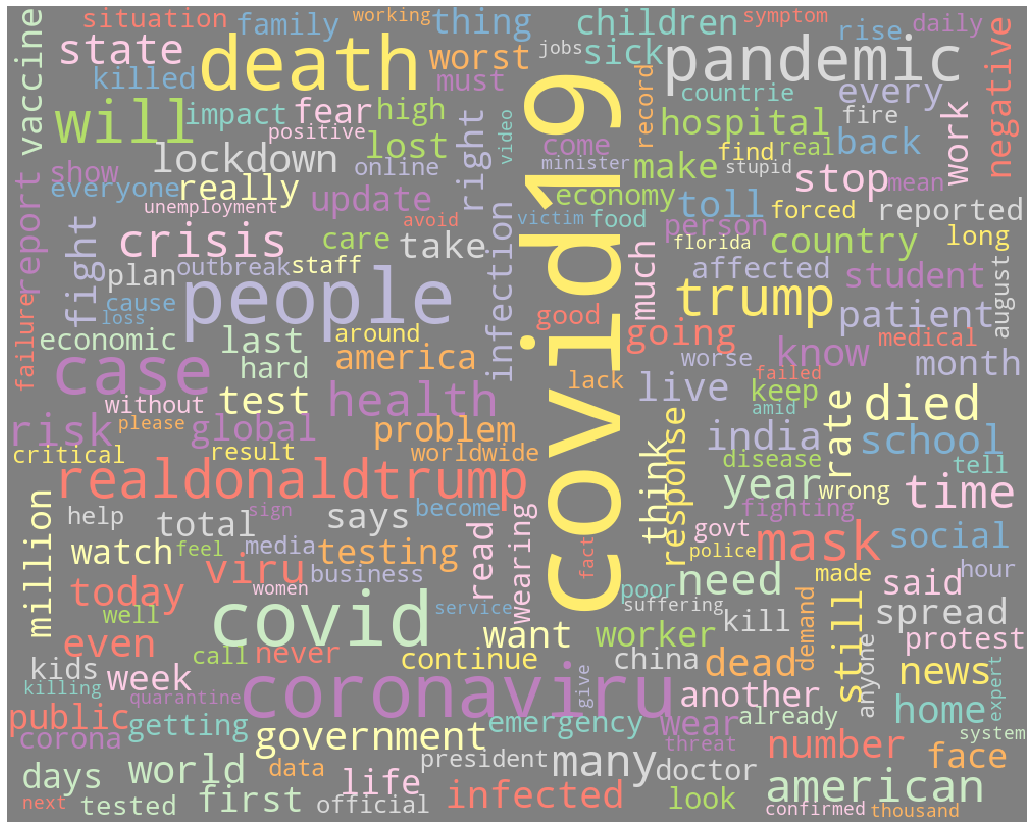

In [13]:
positives = tweets[tweets['sentiment_label'] == 'negative']
better_wordcloud(positives, 'tokenized', stopwoorden)

# Exercise 3

Finally you can also compare other subsets:
- Different countries
- Authors
- Hashtags



In [14]:
ind = tweets[tweets['user_location']=="India" ]

In [18]:
usa = tweets[tweets['user_location'] == 'USA']

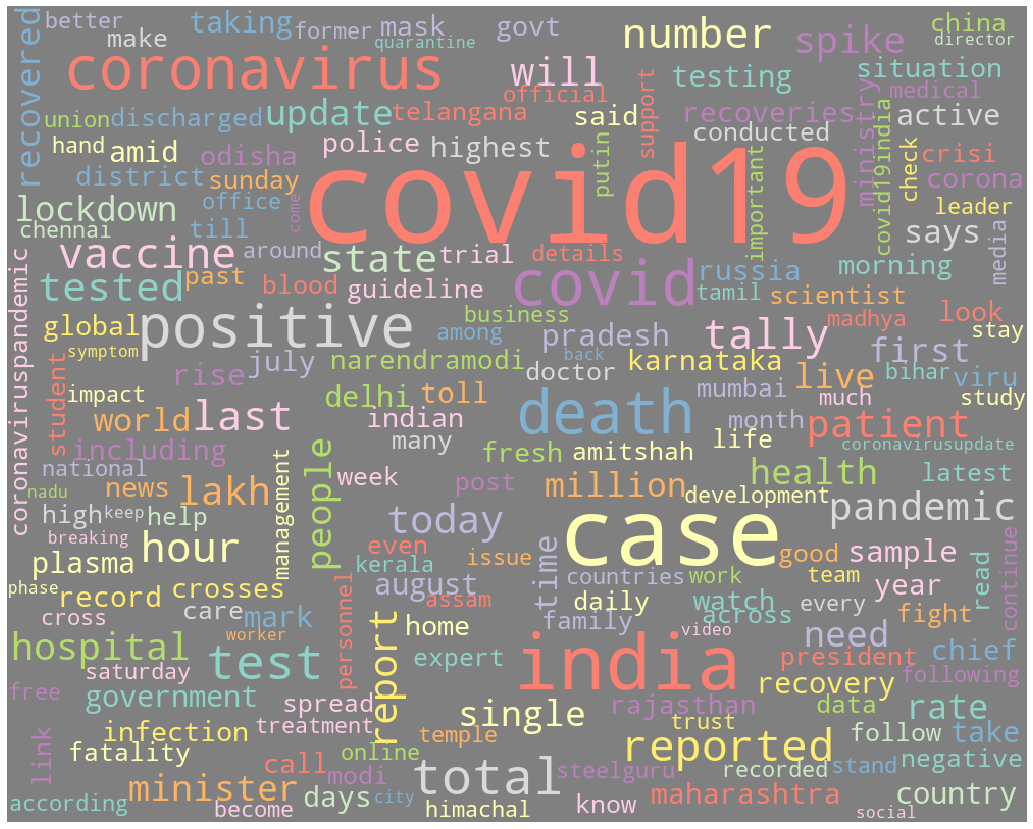

In [20]:
len(ind)
better_wordcloud(ind, 'tokenized', stopwoorden)

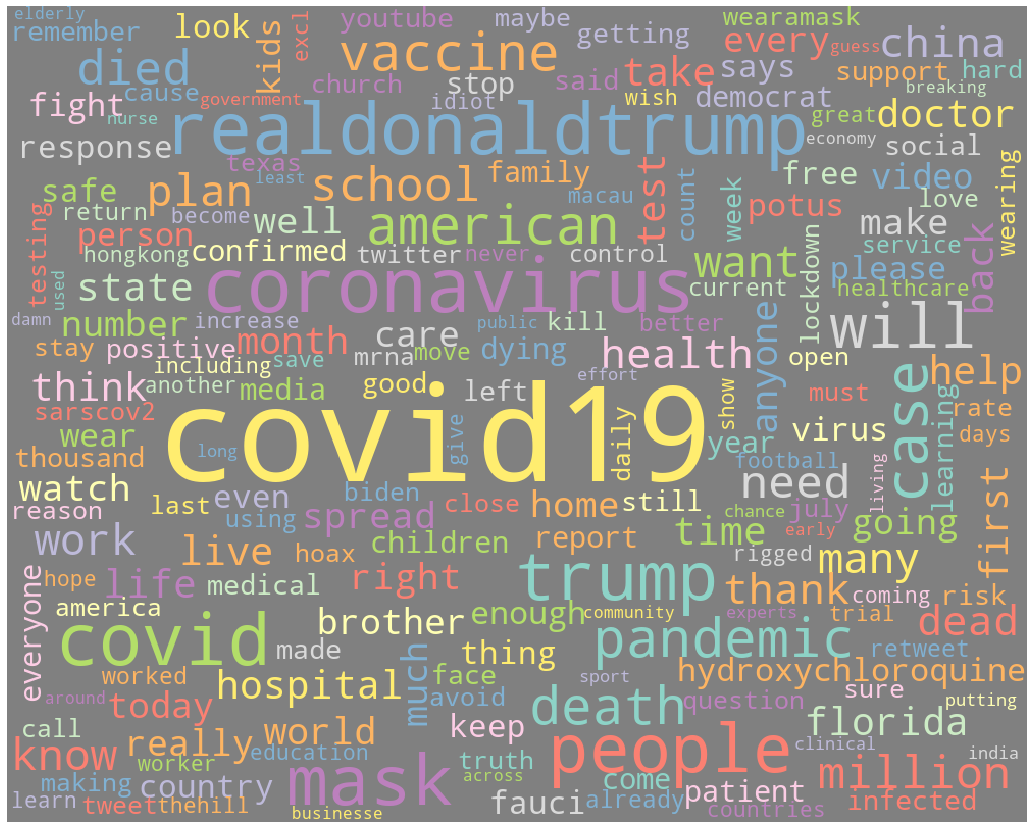

In [21]:
len(usa)
better_wordcloud(usa, 'tokenized', stopwoorden)